In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
trials_data= pd.read_csv('trials_training_data.csv')

In [ ]:
trials_data

In [28]:
trials_data.columns

Index(['Name', 'State', 'Notes', 'User', 'Tags', 'Created', 'Runtime', 'Sweep',
       'base_lr', 'epochs', 'loss', 'loss_weights', 'max_lr', 'mode',
       'optimizer', 'optuna_trial', 'scheduler', 'RhiresD/train',
       'RhiresD/val', 'TabsD/train', 'TabsD/val', 'TmaxD/train', 'TmaxD/val',
       'TminD/train', 'TminD/val', 'best_val_loss',
       'best_val_loss_per_channel', 'epoch', 'epoch_time', 'loss/train',
       'loss/val', 'lr', 'precip_val_loss', 'temp_val_loss', 'tmax_val_loss',
       'tmin_val_loss', 'total_val_loss', 'trial', 'weights',
       'initial_weights'],
      dtype='object')

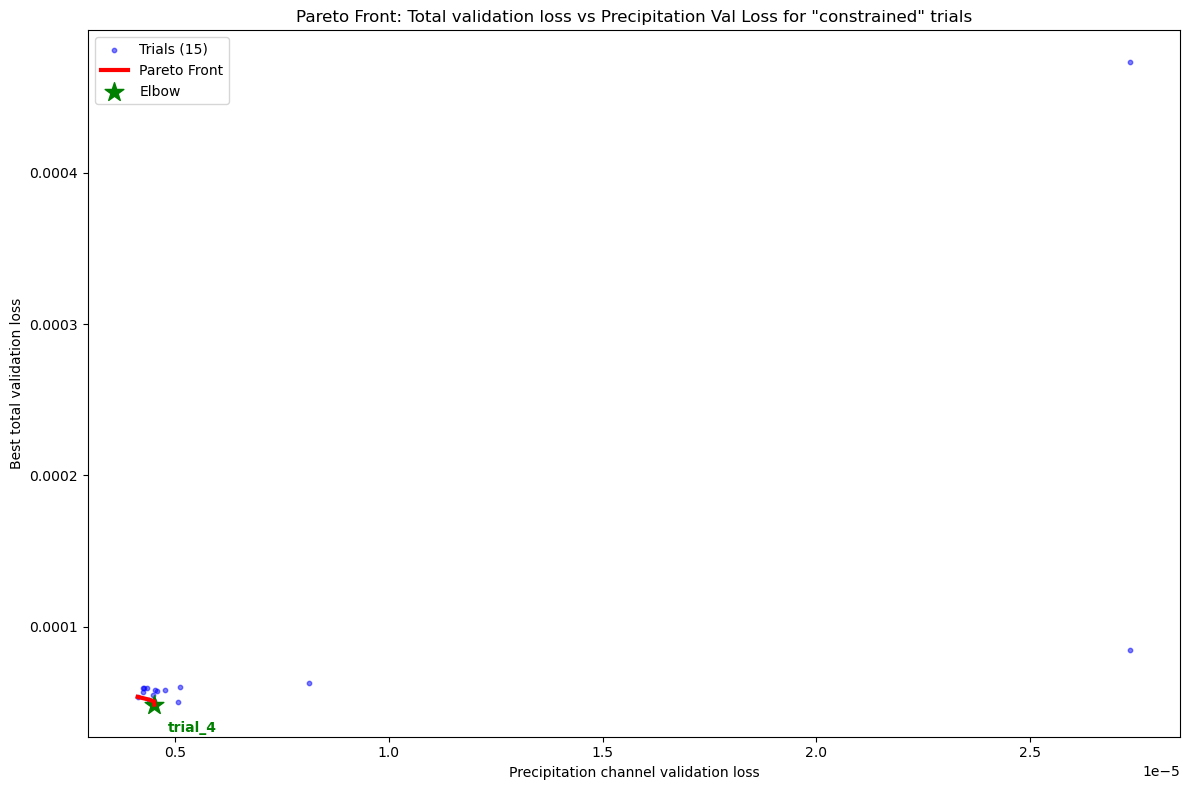

In [29]:
x = trials_data['RhiresD/val'].values
y = trials_data['best_val_loss'].values

def pareto_front_2d(x, y):
    # Sort by x (first objective)
    idx_sorted = np.argsort(x)
    pareto_idx = []
    min_y = np.inf
    for idx in idx_sorted:
        if y[idx] < min_y:
            pareto_idx.append(idx)
            min_y = y[idx]
    pareto_points = np.array(list(zip(x[pareto_idx], y[pareto_idx])))
    return pareto_points, np.array(pareto_idx)

pareto_points, pareto_idx = pareto_front_2d(x, y)

plt.figure(figsize=(12, 8))
plt.scatter(x, y, label='Trials (15)', color='blue', alpha=0.5, s=10)
plt.plot(pareto_points[:,0], pareto_points[:,1], color='red', linewidth=3, label='Pareto Front')

# Find Pareto point closest to origin
pareto_distances = np.sqrt(pareto_points[:,0]**2 + pareto_points[:,1]**2)
elbow_idx = np.argmin(pareto_distances)
elbow_x, elbow_y = pareto_points[elbow_idx]
elbow_trial_idx = pareto_idx[elbow_idx]
elbow_trial_num = trials_data.iloc[elbow_trial_idx]['Name']

plt.scatter(elbow_x, elbow_y, marker='*', s=200, color='green', label='Elbow')
plt.annotate(f'{elbow_trial_num}', (elbow_x, elbow_y),
             textcoords="offset points", xytext=(10,-20), ha='left', color='green', fontsize=10, fontweight='bold')

plt.xlabel('Precipitation channel validation loss')
plt.ylabel('Best total validation loss')
plt.title('Pareto Front: Total validation loss vs Precipitation Val Loss for "constrained" trials')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.savefig('pareto_front_plot.png', dpi=500, bbox_inches='tight')
plt.show()
